## Quick data overview

In [1]:
import networkx as nx
import fa2_modified as fa2
import matplotlib.pyplot as plt
import pandas

In [30]:
# read the companies
companies = pandas.read_csv('./archive/companies.csv')

# read the links
links = pandas.read_csv('./archive/links.csv')


/var/folders/v6/q9xwr1gn2dvdngsx947dpj280000gn/T/ipykernel_17939/3373668509.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  links = pandas.read_csv('./archive/links.csv')


In [31]:
companies.head()

,index,_id,update_time,domain,name,username
0,0,{'$oid': '54dd19c08899a4c549dc71cd'},{'$date': '2015-03-31T17:14:48.439-0700'},f5.com,F5 Networks,rjurney
1,1,{'$oid': '54dd19c08899a4c549dc71ce'},{'$date': '2015-04-09T15:13:18.808-0700'},dell.com,Dell,rjurney
2,2,{'$oid': '54dd19c08899a4c549dc71d0'},{'$date': '2015-03-25T22:56:10.886-0700'},att.com,AT&T,rjurney
3,3,{'$oid': '54dd19c08899a4c549dc71d2'},{'$date': '2015-04-10T13:16:46.234-0700'},verizon.com,Verizon,rjurney
4,4,{'$oid': '54dd19c08899a4c549dc71d4'},{'$date': '2015-04-10T14:36:18.843-0700'},hp.com,Hewlett Packard,rjurney


In [33]:
# randomly select 500 companies
companies_3000 = companies.sample(3000)
print(len(companies_3000))


3000


In [34]:
links.head()

,index,_id,home_name,link_name,type,update_time,home_domain,link_domain,username,name
0,0,{'$oid': '54dd19c08899a4c549dc71cf'},F5 Networks,Dell,partnership,{'$date': '2015-02-12T21:23:12.929Z'},f5.com,dell.com,rjurney,NaN
1,1,{'$oid': '54dd19c08899a4c549dc71d1'},F5 Networks,AT&T,partnership,{'$date': '2015-02-12T21:23:12.932Z'},f5.com,att.com,rjurney,NaN
2,2,{'$oid': '54dd19c08899a4c549dc71d3'},F5 Networks,Verizon,partnership,{'$date': '2015-02-12T21:23:12.932Z'},f5.com,verizon.com,rjurney,NaN
3,3,{'$oid': '54dd19c08899a4c549dc71d5'},F5 Networks,Hewlett Packard,partnership,{'$date': '2015-02-12T21:23:12.933Z'},f5.com,hp.com,rjurney,NaN
4,4,{'$oid': '54dd19c08899a4c549dc71d7'},F5 Networks,IBM,partnership,{'$date': '2015-02-12T21:23:12.934Z'},f5.com,ibm.com,rjurney,NaN


In [52]:
# print the different values of the link type
link_list = links['type'].unique()
print(links['type'].unique())

['partnership' 'customer' 'competitor' 'investment' nan 'supplier']


In [37]:
# filter the links to only include the companies in the companies_5000
links_3000 = links[links['home_name'].isin(companies_3000['name'])]
print(len(links_3000))


18419


In [42]:
# create a graph where the nodes are the companies
G = nx.Graph()

for i, company in companies.iterrows():
    # if the node is not already in the graph, add it
    if company['name'] not in G.nodes:
        G.add_node(company['name'])
        # add an attribute
        G.nodes[company['name']]['domain'] = company['domain']

In [43]:
print(len(G.nodes))

50535


In [44]:
# create the edges between the companies
for i, link in links.iterrows():
    # if the node exist create an edge with the other node
    if link['home_name'] in G.nodes and link['link_name'] in G.nodes:
        G.add_edge(link['home_name'], link['link_name'])
        # add attributes to the edge
        G.edges[link['home_name'], link['link_name']]['type'] = link['type']

In [45]:
print(f"Nodes: {len(G.nodes)}")
print(f"Edges: {len(G.edges)}")

Nodes: 50535
Edges: 190855


In [46]:
# check if a node exists
print('Coca-Cola' in G.nodes)

True


In [47]:
# Get the node that has the most connections
max_degree = 0
max_node = None
for node in G.nodes:
    if G.degree[node] > max_degree:
        max_degree = G.degree[node]
        max_node = node

print(max_node, max_degree)

Cisco 12744


In [77]:
# bigger companies 
companies_selected_list = ['Google', 'Apple', 'Facebook', 'Amazon', 'Microsoft']

# Dictionary to store each company's subgraph
subgraphs_selected = {}

# Loop through each company and create a subgraph of its immediate neighbors
for company in companies_selected_list:
    if company in G:
        # Get the neighbors of the company
        neighbors = list(G.neighbors(company))
        
        # Create a subgraph that includes the company and its neighbors
        subgraph = G.subgraph([company] + neighbors)
        
        # Store the subgraph in the dictionary
        subgraphs_selected[company] = subgraph

print(subgraphs_selected)
    

{'Google': <networkx.classes.graph.Graph object at 0x41c928ad0>, 'Apple': <networkx.classes.graph.Graph object at 0x41c9291c0>, 'Facebook': <networkx.classes.graph.Graph object at 0x41c92a7e0>, 'Microsoft': <networkx.classes.graph.Graph object at 0x41c9293d0>}


In [78]:
# provide simple statiscits about the subgraphs
for company, subgraph in subgraphs_selected.items():
    print(f"Company: {company}")
    print(f"Nodes: {len(subgraph.nodes)}")
    print(f"Edges: {len(subgraph.edges)}")
    print(f"Density: {nx.density(subgraph)}")
    print(f"Average Clustering: {nx.average_clustering(subgraph)}")
    print(f"Average Shortest Path Length: {nx.average_shortest_path_length(subgraph)}")
    print("\n")

Company: Google
Nodes: 2873
Edges: 57517
Density: 0.013941392680096218
Average Clustering: 0.4572806937806207
Average Shortest Path Length: 1.9860586073199038


Company: Apple
Nodes: 41
Edges: 73
Density: 0.08902439024390243
Average Clustering: 0.5794924587607514
Average Shortest Path Length: 1.9109756097560975


Company: Facebook
Nodes: 2229
Edges: 45954
Density: 0.018506660609736353
Average Clustering: 0.47313066023656647
Average Shortest Path Length: 1.9814933393902636


Company: Microsoft
Nodes: 4343
Edges: 64381
Density: 0.006828228804262921
Average Clustering: 0.4084330872320393
Average Shortest Path Length: 1.993171771195737




In [61]:
# remove the nan element from link_list
link_list = link_list[~pandas.isnull(link_list)]

# for each company print the number of links per type
for company, subgraph in subgraphs_selected.items():
    print(f"Company: {company}")
    print("Number of links per type:")
    for link_type in link_list:
        count = 0
        for edge in subgraph.edges:
            if subgraph.edges[edge]['type'] == link_type:
                count += 1
        print(f"{link_type}: {count}")
    print("\n")

Company: Google
Number of links per type:
partnership: 16124
customer: 5
competitor: 3845
investment: 16222
supplier: 21321


Company: Apple
Number of links per type:
partnership: 62
customer: 1
competitor: 1
investment: 0
supplier: 9


Company: Facebook
Number of links per type:
partnership: 12497
customer: 6
competitor: 3270
investment: 13173
supplier: 17008


Company: Microsoft
Number of links per type:
partnership: 20566
customer: 4
competitor: 4066
investment: 16815
supplier: 22930




In [48]:
# genarate a list of the degrees of the nodes
degrees = [G.degree[node] for node in G.nodes]
G_copy = G.copy()

# print the 5 companies that have the highest degree
for i in range(5):
    max_degree = 0
    max_node = None
    for node in G_copy.nodes:
        if G_copy.degree[node] > max_degree:
            max_degree = G_copy.degree[node]
            max_node = node
    print(max_node, max_degree)
    G_copy.remove_node(max_node)

Cisco 12744
Microsoft 4341
Rackspace 3561
Google 2869
IBM 2627


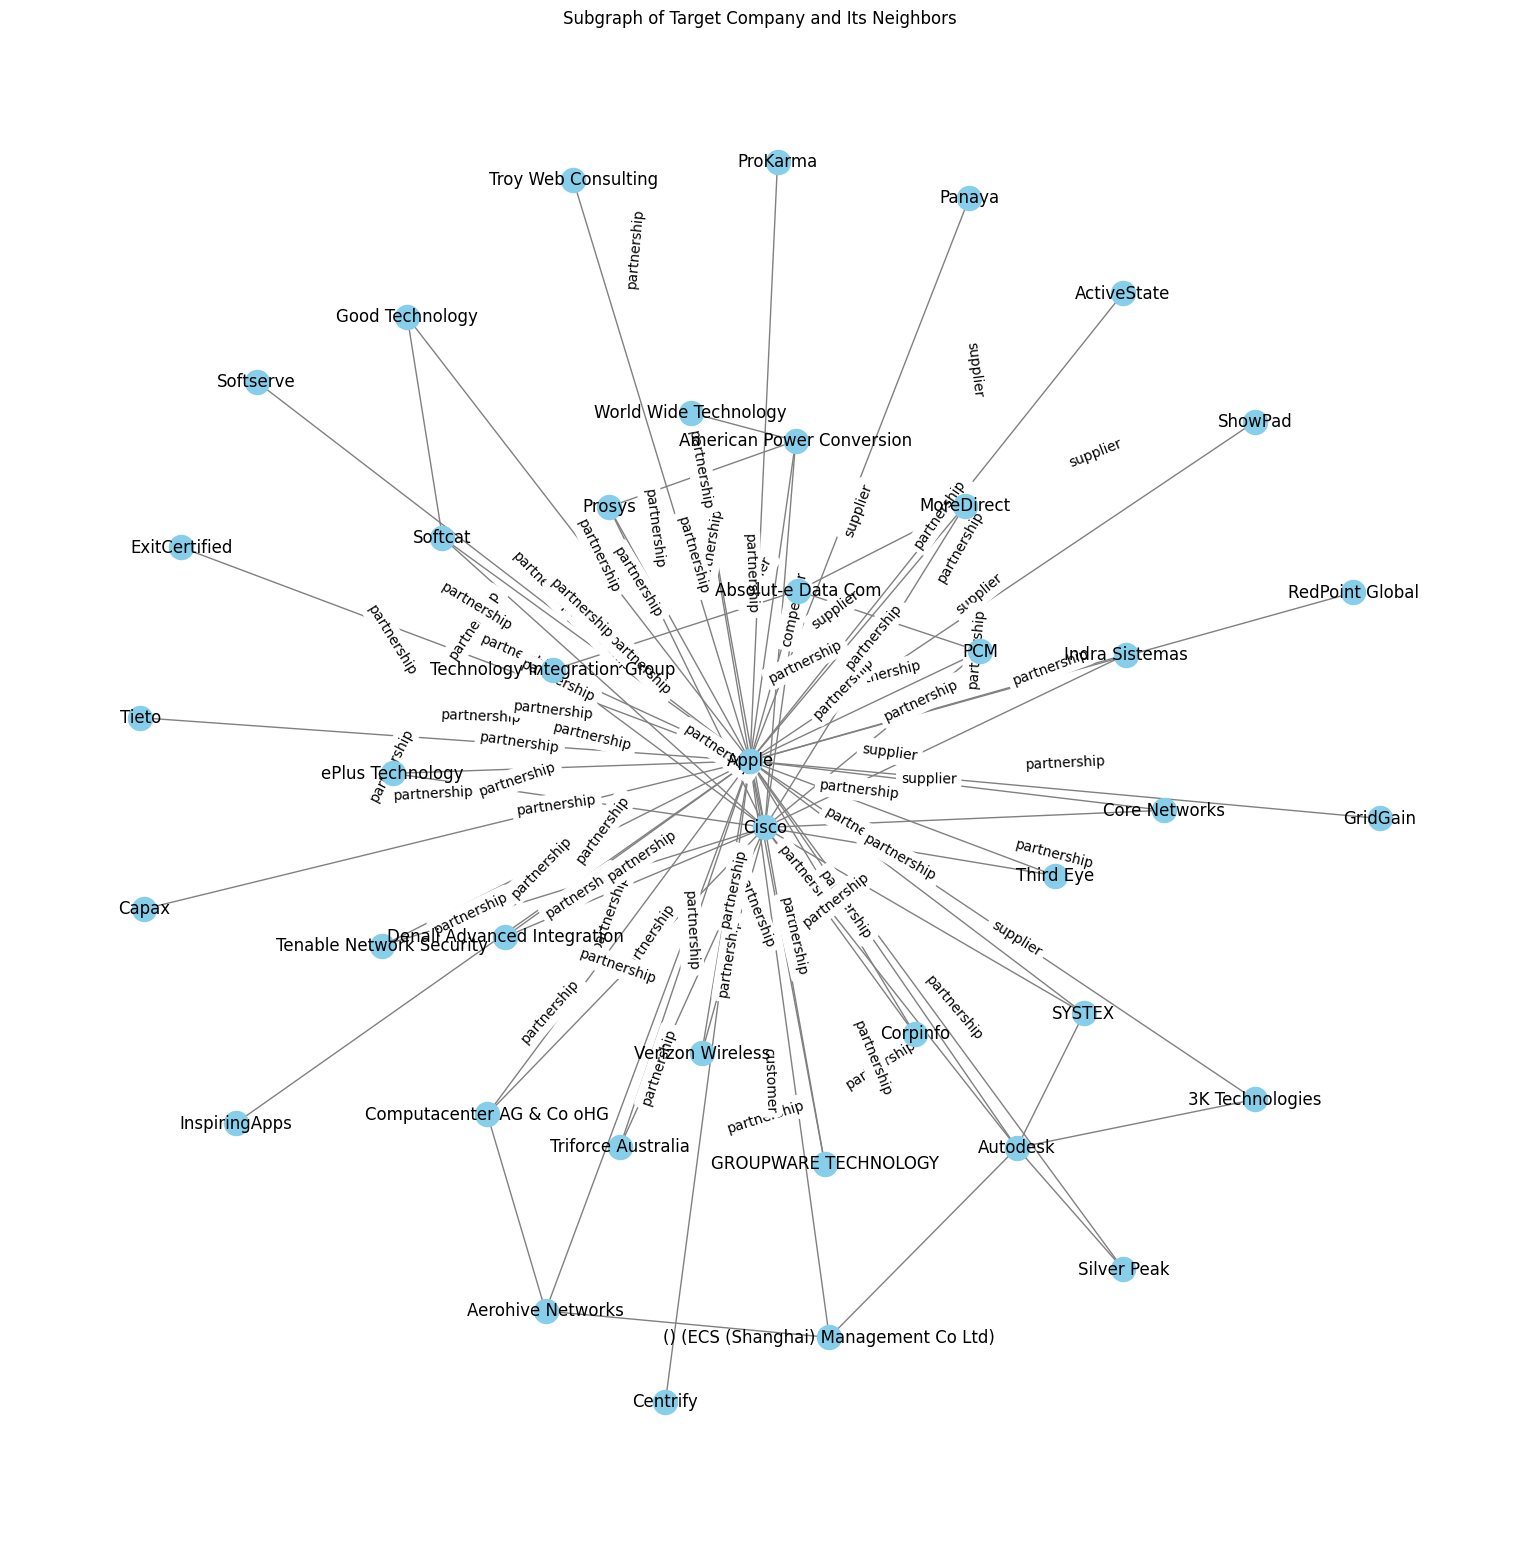

In [64]:
# get the subgraph of a specific company
# One degree of separation (direct connections)
# target_company = "Microsoft"

# neighbors_1 = list(G.neighbors(target_company))
# subgraph_1 = G.subgraph([target_company] + neighbors_1)

# print(f"Number of nodes in the subgraph: {len(subgraph_1.nodes)}")
# print(f"Number of edges in the subgraph: {len(subgraph_1.edges)}")

# Two degrees of separation (connections up to two hops away)
# neighbors_2 = set(neighbors_1)
# for neighbor in neighbors_1:
#     neighbors_2.update(G.neighbors(neighbor))

# subgraph_2 = G.subgraph([target_company] + list(neighbors_2))

# print(f"Number of nodes in the subgraph: {len(subgraph_2.nodes)}")
# print(f"Number of edges in the subgraph: {len(subgraph_2.edges)}")

# plot the two subgraphs
plt.figure(figsize=(15, 15))
nx.draw(subgraphs_selected['Apple'], with_labels=True, node_color="skyblue", edge_color="gray")
# Extract edge labels (in this case, the 'type' property for each edge)
edge_labels = nx.get_edge_attributes(subgraphs_selected['Apple'], 'type')

# Draw edge labels
nx.draw_networkx_edge_labels(subgraphs_selected['Apple'], pos=nx.spring_layout(subgraphs_selected['Apple']), edge_labels=edge_labels)
plt.title("Subgraph of Target Company and Its Neighbors")
plt.show()


# plt.subplot(122)
# plt.title(f"Two degrees of separation from {target_company}")
# pos = nx.spring_layout(subgraph_2)
# nx.draw(subgraph_2, pos, with_labels=True, node_size=3000, font_size=10, font_color='white', node_color='blue')
# plt.axis('off')


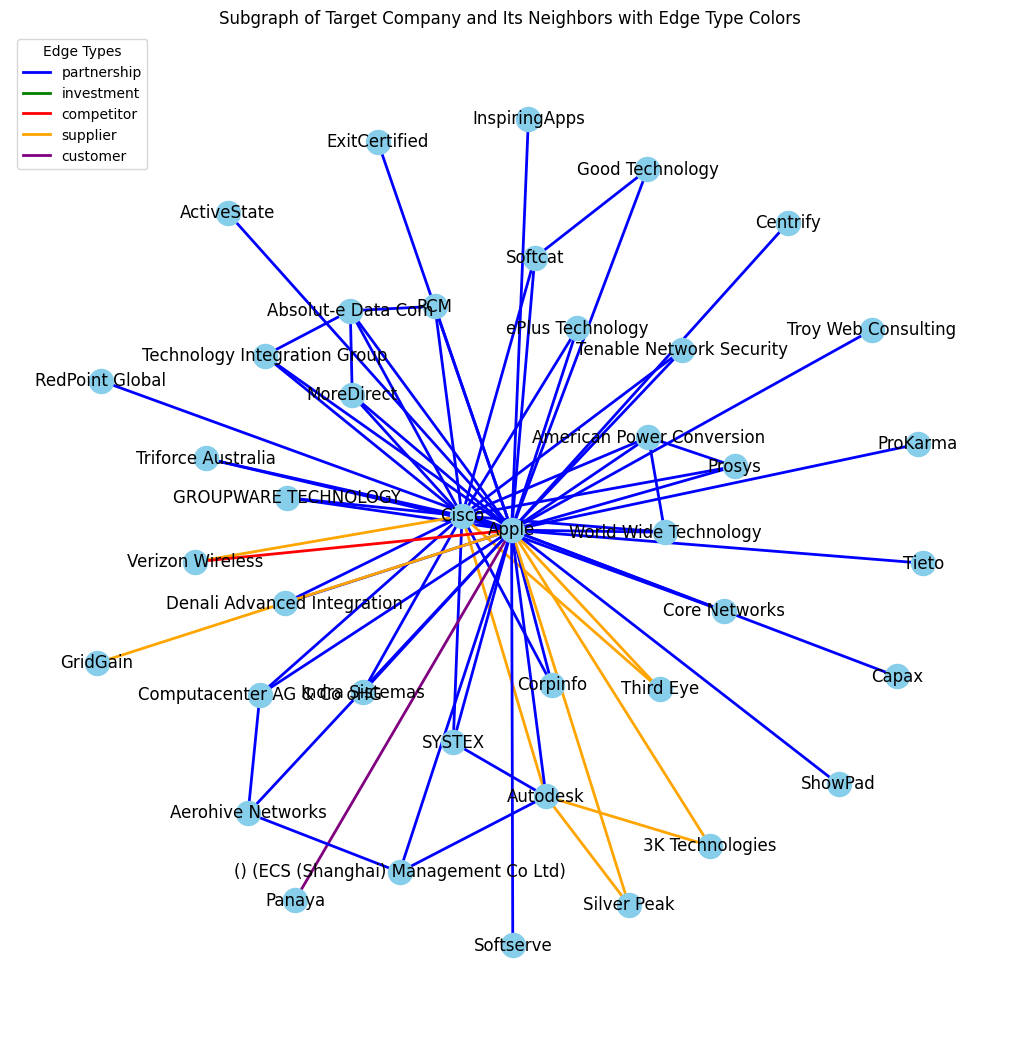

In [79]:
# Define a color mapping for each edge type
edge_type_to_color = {
    "partnership": "blue",
    "investment": "green",
    "competitor": "red",
    "supplier": "orange",
    "customer": "purple"
}

# partnership: 62
# customer: 1
# competitor: 1
# investment: 0
# supplier: 9

# Create a color list for edges based on their 'type' attribute
edge_colors = [
    edge_type_to_color.get(subgraphs_selected['Apple'][u][v]["type"], "gray")  # Default to gray if type not in the mapping
    for u, v in subgraphs_selected['Apple'].edges()
]

# Draw the graph with colored edges
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraphs_selected['Apple'])  # Store position layout to keep nodes and edges aligned
nx.draw(subgraphs_selected['Apple'], pos, with_labels=True, node_color="skyblue", edge_color=edge_colors, width=2)

# Create legend elements
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color=color, lw=2, label=edge_type)
    for edge_type, color in edge_type_to_color.items()
]

# Plot the legend
plt.legend(handles=legend_elements, title="Edge Types", loc="upper left")
plt.title("Subgraph of Target Company and Its Neighbors with Edge Type Colors")
plt.show()

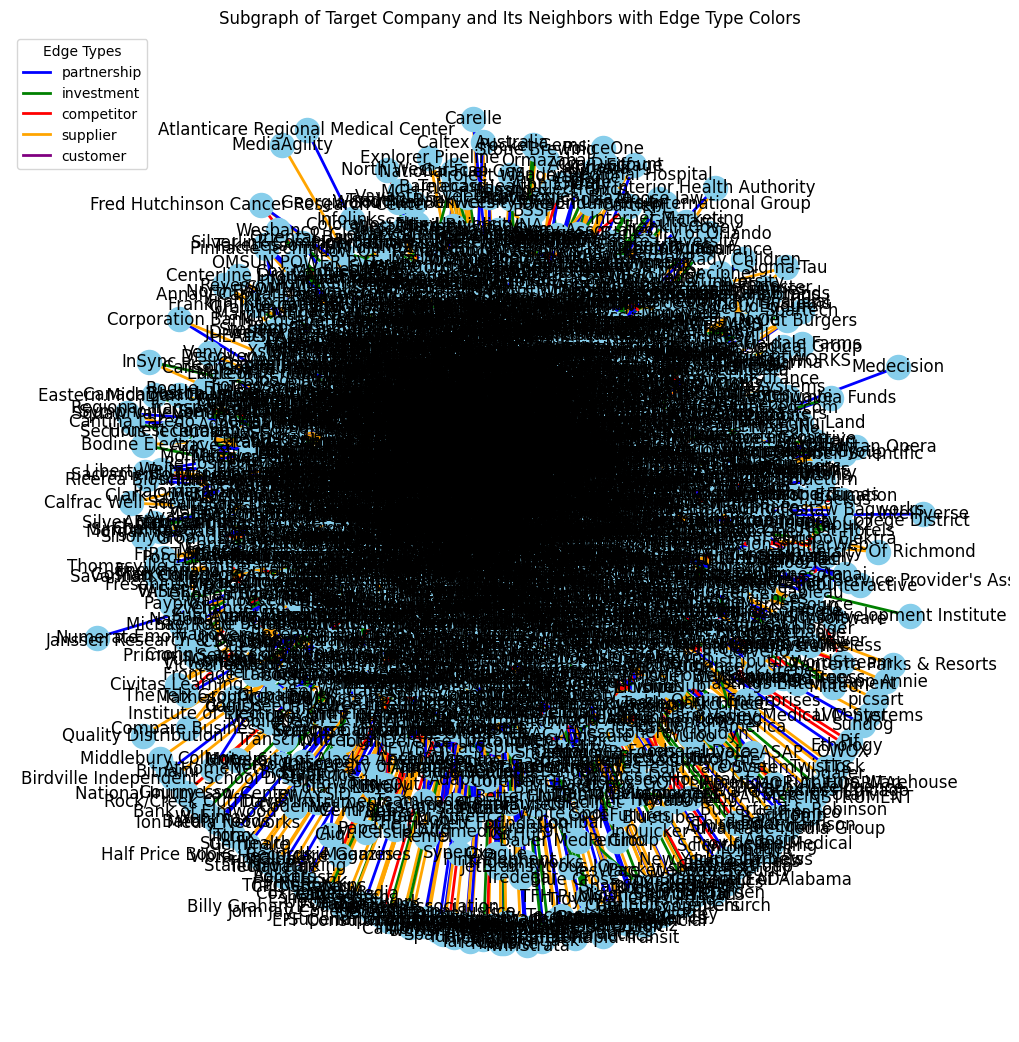

In [81]:
# Create a color list for edges based on their 'type' attribute
edge_colors = [
    edge_type_to_color.get(subgraphs_selected['Google'][u][v]["type"], "gray")  # Default to gray if type not in the mapping
    for u, v in subgraphs_selected['Google'].edges()
]

# Draw the graph with colored edges
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraphs_selected['Google'])  # Store position layout to keep nodes and edges aligned
nx.draw(subgraphs_selected['Google'], pos, with_labels=True, node_color="skyblue", edge_color=edge_colors, width=2)

# Create legend elements
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color=color, lw=2, label=edge_type)
    for edge_type, color in edge_type_to_color.items()
]

# Plot the legend
plt.legend(handles=legend_elements, title="Edge Types", loc="upper left")
plt.title("Subgraph of Target Company and Its Neighbors with Edge Type Colors")
plt.show()

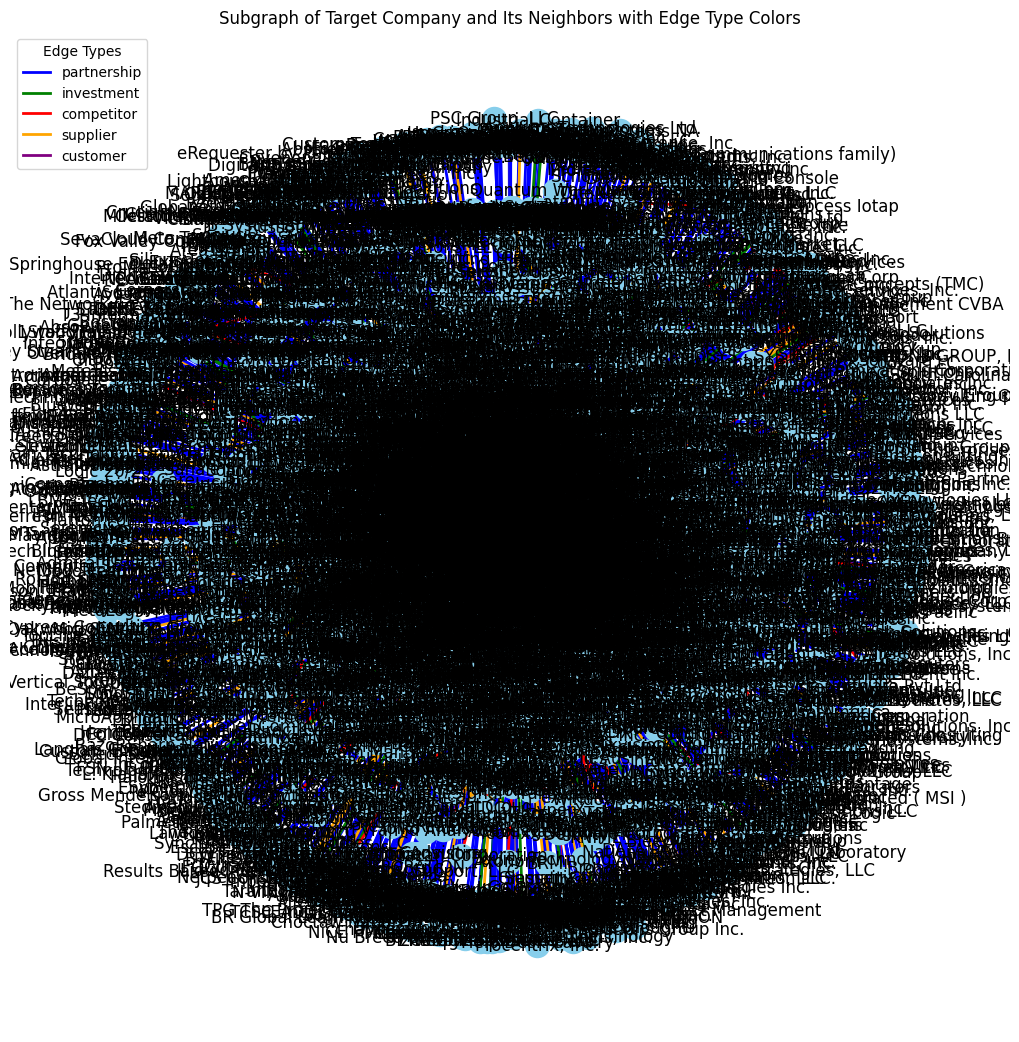

In [85]:
# Create a color list for edges based on their 'type' attribute
edge_colors = [
    edge_type_to_color.get(subgraphs_selected['Microsoft'][u][v]["type"], "gray")  # Default to gray if type not in the mapping
    for u, v in subgraphs_selected['Microsoft'].edges()
]

# Draw the graph with colored edges
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(subgraphs_selected['Microsoft'])  # Store position layout to keep nodes and edges aligned
nx.draw(subgraphs_selected['Microsoft'], pos, with_labels=True, node_color="skyblue", edge_color=edge_colors, width=2)

# Create legend elements
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color=color, lw=2, label=edge_type)
    for edge_type, color in edge_type_to_color.items()
]

# Plot the legend
plt.legend(handles=legend_elements, title="Edge Types", loc="upper left")
plt.title("Subgraph of Target Company and Its Neighbors with Edge Type Colors")
plt.show()

In [ ]:
# Create a color list for edges based on their 'type' attribute
# edge_colors = [
#     edge_type_to_color.get(subgraphs_selected['Amazon'][u][v]["type"], "gray")  # Default to gray if type not in the mapping
#     for u, v in subgraphs_selected['Amazon'].edges()
# ]

# # Draw the graph with colored edges
# plt.figure(figsize=(10, 10))
# pos = nx.spring_layout(subgraphs_selected['Amazon'])  # Store position layout to keep nodes and edges aligned
# nx.draw(subgraphs_selected['Amazon'], pos, with_labels=True, node_color="skyblue", edge_color=edge_colors, width=2)

# # Create legend elements
# from matplotlib.lines import Line2D

# legend_elements = [
#     Line2D([0], [0], color=color, lw=2, label=edge_type)
#     for edge_type, color in edge_type_to_color.items()
# ]

# # Plot the legend
# plt.legend(handles=legend_elements, title="Edge Types", loc="upper left")
# plt.title("Subgraph of Target Company and Its Neighbors with Edge Type Colors")
# plt.show()

KeyError: 'Amazon'

In [55]:
# # create a subgraph of subgraph_1 based on a specific type of link
# subgraph_supplier = nx.Graph()
# for edge in subgraph_1.edges:
#     if subgraph_1.edges[edge]['type'] == 'supplier':
#         subgraph_supplier.add_edge(edge[0], edge[1])

# print(f"Number of nodes in the subgraph: {len(subgraph_supplier.nodes)}")
# print(f"Number of edges in the subgraph: {len(subgraph_supplier.edges)}")

for link in link_list:
    subgraph_type = nx.Graph()
    for edge in subgraph_1.edges:
        if subgraph_1.edges[edge]['type'] == link:
            subgraph_type.add_edge(edge[0], edge[1])

    print(f"nodes {link}: {len(subgraph_type.nodes)}")
    print(f"edges {link}: {len(subgraph_type.edges)}")

nodes partnership: 3879
edges partnership: 20566
nodes customer: 6
edges customer: 4
nodes competitor: 1764
edges competitor: 4066
nodes investment: 2471
edges investment: 16815
nodes nan: 0
edges nan: 0
nodes supplier: 2733
edges supplier: 22930


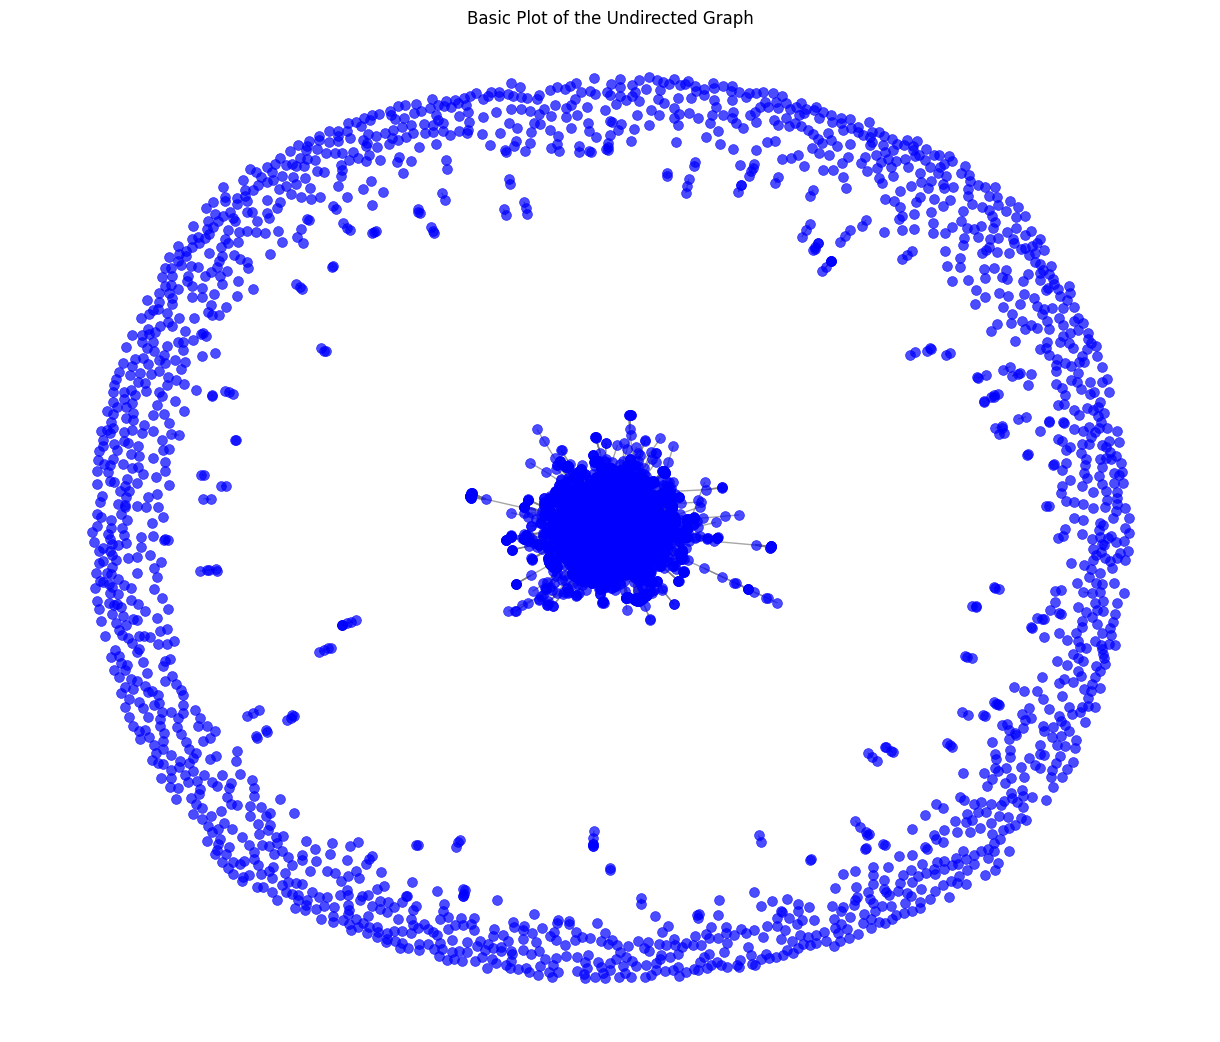

In [12]:
# Create a basic plot of the graph
plt.figure(figsize=(12, 10))
nx.draw(G, with_labels=False, node_size=50, node_color='blue', edge_color='gray', alpha=0.7, linewidths=0.5)
plt.title("Basic Plot of the Undirected Graph")
plt.show()

In [13]:
# visualize the graph with the force atlas 2 algorithm
# plot the network
degrees = dict(G.degree())

# Normalize node sizes based on degree (you can tweak scaling factor if necessary)
node_sizes = [degrees[node] * 50 for node in G.nodes()]

# Get 'length_of_content' attribute for each node, if it exists
# content_lengths = [G.largest_c_subgraph.nodes[node].get('len_content', 0) for node in G.nodes()]

# Normalize content lengths for color mapping
# norm = plt.Normalize(vmin=min(content_lengths), vmax=max(content_lengths))
cmap = plt.get_cmap('hot')  # Choosing a simple sequential colormap

# Draw the network using Kamada-Kawai layout
pos = nx.kamada_kawai_layout(G)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 10))

# Create the scalar mappable (for the color bar)
# sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
# sm.set_array(content_lengths)

# Draw the graph with customized node sizes and colors
nx.draw(
    G, 
    pos, 
    ax=ax,
    with_labels=False,  # Remove labels for clarity
    node_size=node_sizes,  # Size of nodes based on degree
    #  node_color=content_lengths,  # Color based on 'length_of_content' attribute
    cmap=cmap,  # Colormap for node colors
    edge_color='gray',  # Color of edges
    alpha=0.7,  # Transparency of edges
    linewidths=0.5  # Width of edges
)

# Add the color bar to the specific axis
# cbar = fig.colorbar(sm, ax=ax)
# cbar.set_label('Length of Content', color='black')  # Color of the color bar label

# Style adjustments
plt.title("Kamada-Kawai Layout of the Undirected Graph", color='black')
ax.tick_params(colors='black')  # White tick labels
plt.show()

KeyboardInterrupt: 

In [ ]:
# API KEY 00UZ4D7EYBIWFSCZ

In [75]:
import requests

id_list = ['AAPL', 'GOOGL', 'AMZN', 'MSFT', 'META']

data =  {}
for id in id_list:
    url = f'https://www.alphavantage.co/query?function=OVERVIEW&symbol={id}&apikey=00UZ4D7EYBIWFSCZ'
    r = requests.get(url)
    data[id] = r.json()

print(data)

for c in data:
    print(f"Company: {c}")
    print(f"Description: {data[c]['Description']}")
    print(f"Sector: {data[c]['Sector']}")
    print(f"Industry: {data[c]['Industry']}")

# # replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
# url = 'https://www.alphavantage.co/query?function=OVERVIEW&symbol=IBM&apikey=demo'
# r = requests.get(url)
# data = r.json()

# print(data)

{'AAPL': {'Symbol': 'AAPL', 'AssetType': 'Common Stock', 'Name': 'Apple Inc', 'Description': "Apple Inc. is an American multinational technology company that specializes in consumer electronics, computer software, and online services. Apple is the world's largest technology company by revenue (totalling $274.5 billion in 2020) and, since January 2021, the world's most valuable company. As of 2021, Apple is the world's fourth-largest PC vendor by unit sales, and fourth-largest smartphone manufacturer. It is one of the Big Five American information technology companies, along with Amazon, Google, Microsoft, and Facebook.", 'CIK': '320193', 'Exchange': 'NASDAQ', 'Currency': 'USD', 'Country': 'USA', 'Sector': 'TECHNOLOGY', 'Industry': 'ELECTRONIC COMPUTERS', 'Address': 'ONE INFINITE LOOP, CUPERTINO, CA, US', 'OfficialSite': 'https://www.apple.com', 'FiscalYearEnd': 'September', 'LatestQuarter': '2024-09-30', 'MarketCapitalization': '3389415752000', 'EBITDA': '134660997000', 'PERatio': '36.